In [1]:
import numpy as np 
import pandas as pd
import pylab as pl 
import os 
import zipfile
import json
import urllib.request as ulr
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 1) Download two months of citibike data (help) 201501 and 201601. Begin working with 201501, and if you have time repeat the analysis for the other month, to see if your conclusions are robust.

In [2]:
os.getenv('PUIDATA')
myzip = os.getenv('PUIDATA') + '/' + '201506-citibike-tripdata.zip'
myzip = zipfile.ZipFile(myzip)
myzip.extractall()
myzip.open('201506-citibike-tripdata.csv')
cb2015 = pd.read_csv('201506-citibike-tripdata.csv')

## 2) Downloading income data from IRS

In [3]:
dataFile = os.getenv('PUIDATA') + '/' + '14zp33ny.xls'
incomeByZip = pd.read_excel(dataFile, skiprows=3,index_col="ZIP\ncode [1]")

In [4]:
cb2015.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [5]:
incomeByZip.columns

Index(['Size of adjusted gross income', 'Number of returns',
       'Number of single returns', 'Number of joint returns',
       'Number of head of household returns',
       'Number with paid preparer's signature', 'Number of exemptions',
       'Number of dependents', 'Number of volunteer prepared returns [2]',
       'Unnamed: 10',
       ...
       'Total tax liability [9]', 'Unnamed: 116', 'Additional Medicare tax',
       'Unnamed: 118', 'Net investment income tax', 'Unnamed: 120',
       'Tax due at time of filing [10]', 'Unnamed: 122',
       'Overpayments refunded [11]', 'Unnamed: 124'],
      dtype='object', length=124)

In [6]:
incomeByZip.head()

,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Number of volunteer prepared returns [2],Unnamed: 10,...,Total tax liability [9],Unnamed: 116,Additional Medicare tax,Unnamed: 118,Net investment income tax,Unnamed: 120,Tax due at time of filing [10],Unnamed: 122,Overpayments refunded [11],Unnamed: 124
ZIP code [1],,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Number of volunteer income tax assistance (VIT...,...,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount
NaN,NaN,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8,-9,...,-114,-115,-116,-117,-118,-119,-120,-121,-122,-123
0,Total,9397410.0,4750550.0,2942890.0,1515950.0,6110600.0,17322490.0,5539120.0,279510,197150,...,7229610,129761061,280780,900175,300410,2745701,1781540,10177242,7115810,25052463
0,"$1 under $25,000",3617400.0,2432240.0,468500.0,665410.0,2247810.0,5220510.0,1678560.0,187260,136800,...,1804270,1677200,0,0,0,0,451080,361017,2886740,6049923
0,"$25,000 under $50,000",2070870.0,1103290.0,449390.0,467540.0,1280840.0,3729240.0,1219770.0,69390,49620,...,1769800,4790944,0,0,0,0,287080,461908,1747120,4510472


In [7]:
print ("Adjusted gross income (AGI)  for zipcode 10001:", 
       incomeByZip.loc[[10001]]["Adjusted gross income (AGI) [3]"].iloc[0])

Adjusted gross income (AGI)  for zipcode 10001: 2363960.0


In [8]:
incomeByZip.head()

,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Number of volunteer prepared returns [2],Unnamed: 10,...,Total tax liability [9],Unnamed: 116,Additional Medicare tax,Unnamed: 118,Net investment income tax,Unnamed: 120,Tax due at time of filing [10],Unnamed: 122,Overpayments refunded [11],Unnamed: 124
ZIP code [1],,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Number of volunteer income tax assistance (VIT...,...,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount
NaN,NaN,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8,-9,...,-114,-115,-116,-117,-118,-119,-120,-121,-122,-123
0,Total,9397410.0,4750550.0,2942890.0,1515950.0,6110600.0,17322490.0,5539120.0,279510,197150,...,7229610,129761061,280780,900175,300410,2745701,1781540,10177242,7115810,25052463
0,"$1 under $25,000",3617400.0,2432240.0,468500.0,665410.0,2247810.0,5220510.0,1678560.0,187260,136800,...,1804270,1677200,0,0,0,0,451080,361017,2886740,6049923
0,"$25,000 under $50,000",2070870.0,1103290.0,449390.0,467540.0,1280840.0,3729240.0,1219770.0,69390,49620,...,1769800,4790944,0,0,0,0,287080,461908,1747120,4510472


In [9]:
incomeByZip['Index'] = incomeByZip.index
incomeByZip.head()

,Size of adjusted gross income,Number of returns,Number of single returns,Number of joint returns,Number of head of household returns,Number with paid preparer's signature,Number of exemptions,Number of dependents,Number of volunteer prepared returns [2],Unnamed: 10,...,Unnamed: 116,Additional Medicare tax,Unnamed: 118,Net investment income tax,Unnamed: 120,Tax due at time of filing [10],Unnamed: 122,Overpayments refunded [11],Unnamed: 124,Index
ZIP code [1],,,,,,,,,,,,,,,,,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Total,Number of volunteer income tax assistance (VIT...,...,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,Number of returns,Amount,NaN
NaN,NaN,-1.0,-2.0,-3.0,-4.0,-5.0,-6.0,-7.0,-8,-9,...,-115,-116,-117,-118,-119,-120,-121,-122,-123,NaN
0,Total,9397410.0,4750550.0,2942890.0,1515950.0,6110600.0,17322490.0,5539120.0,279510,197150,...,129761061,280780,900175,300410,2745701,1781540,10177242,7115810,25052463,0
0,"$1 under $25,000",3617400.0,2432240.0,468500.0,665410.0,2247810.0,5220510.0,1678560.0,187260,136800,...,1677200,0,0,0,0,451080,361017,2886740,6049923,0
0,"$25,000 under $50,000",2070870.0,1103290.0,449390.0,467540.0,1280840.0,3729240.0,1219770.0,69390,49620,...,4790944,0,0,0,0,287080,461908,1747120,4510472,0


In [10]:
print ("Adjusted gross income (AGI)  for zipcode 10001:", 
       incomeByZip.loc[[10001]]["Adjusted gross income (AGI) [3]"].iloc[0])

Adjusted gross income (AGI)  for zipcode 10001: 2363960.0


In [11]:
incomeByZip['zipcs'] = pd.to_numeric(incomeByZip['Index'], errors = 'coerce')

In [12]:
zipcs = incomeByZip['zipcs']

In [13]:
zipcs = zipcs[~np.isnan(zipcs)].astype(int)
zipcs = list(set(zipcs))
zipcs[:10]

[0, 99999, 10001, 10002, 10003, 10004, 10005, 10006, 10007, 10009]

In [14]:
zipincome = incomeByZip.copy()
zipincome['ZipCodes'] = zipincome['zipcs']
zipincome['Income'] = zipincome['Adjusted gross income (AGI) [3]']
zipincome['N'] = zipincome ['Number of returns']
zipincome['Njoint'] = zipincome['Number of joint returns']
zipincome['Ndeps'] = zipincome['Number of dependents']
zipincome['incomePC'] = zipincome['Income'] / (zipincome['N']+ zipincome['Ndeps']+ zipincome['Njoint'])
zipincome = zipincome[['ZipCodes','Income','N','Njoint','Ndeps','incomePC']]
zipincome.head()

,ZipCodes,Income,N,Njoint,Ndeps,incomePC
ZIP code [1],,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,-11.0,-1.0,-3.0,-7.0,1.000000
0,0.0,766646080.0,9397410.0,2942890.0,5539120.0,42.878688
0,0.0,43301874.0,3617400.0,468500.0,1678560.0,7.511870
0,0.0,75271045.0,2070870.0,449390.0,1219770.0,20.125786


In [15]:
zipincome = zipincome.drop_duplicates('ZipCodes',keep = 'first')
zipincome.head()

,ZipCodes,Income,N,Njoint,Ndeps,incomePC
ZIP code [1],,,,,,
NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,0.0,766646080.0,9397410.0,2942890.0,5539120.0,42.878688
10001,10001.0,2363960.0,14080.0,2410.0,3250.0,119.754813
10002,10002.0,2215542.0,43370.0,11040.0,19160.0,30.114748
10003,10003.0,6910992.0,29810.0,5460.0,4790.0,172.516026


## 3) Find the zipcodes of citibike stations by reverse geocoding the coordinates

In [16]:
url ='http://cosmo.nyu.edu/~fb55/UI_CUSP_2015/data/stationsZips2015.json'
response = ulr.urlopen(url)
stid2zip = response.read().decode("utf-8")
stid2zip = json.loads(stid2zip)


cb2015['ZipCodes'] = cb2015['start station id'].astype(str).map(stid2zip)

In [17]:
cbgroup = cb2015.groupby(['ZipCodes']).count()
cbgroup['ZipCodes'] = cbgroup.index
cbgroup.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ZipCodes
ZipCodes,,,,,,,,,,,,,,,,
914,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3675,3369,3675,914
1001,628,628,628,628,628,628,628,628,628,628,628,628,628,562,628,1001
1007,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664,3664,2905,3664,1007
1022,992,992,992,992,992,992,992,992,992,992,992,992,992,911,992,1022
1109,707,707,707,707,707,707,707,707,707,707,707,707,707,471,707,1109


In [18]:
cbgroup.drop(cbgroup[cbgroup['ZipCodes'] < 10000].index,inplace = True)
cbgroup.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ZipCodes
ZipCodes,,,,,,,,,,,,,,,,
10001,51691,51691,51691,51691,51691,51691,51691,51691,51691,51691,51691,51691,51691,45571,51691,10001
10002,45970,45970,45970,45970,45970,45970,45970,45970,45970,45970,45970,45970,45970,40795,45970,10002
10003,74663,74663,74663,74663,74663,74663,74663,74663,74663,74663,74663,74663,74663,67536,74663,10003
10004,13698,13698,13698,13698,13698,13698,13698,13698,13698,13698,13698,13698,13698,9850,13698,10004
10005,9631,9631,9631,9631,9631,9631,9631,9631,9631,9631,9631,9631,9631,7992,9631,10005


## 4) Merge the datasets

In [19]:
cbincome = pd.merge(cbgroup, zipincome, on = 'ZipCodes')
cbincome['Nrides'] = cbincome ['starttime']
cbincome = cbincome[['ZipCodes','Income','N','Njoint','Ndeps','incomePC','Nrides']]
cbincome.head(30)

,ZipCodes,Income,N,Njoint,Ndeps,incomePC,Nrides
0,10001,2363960.0,14080.0,2410.0,3250.0,119.754813,51691
1,10002,2215542.0,43370.0,11040.0,19160.0,30.114748,45970
2,10003,6910992.0,29810.0,5460.0,4790.0,172.516026,74663
3,10004,925417.0,2540.0,840.0,1130.0,205.192239,13698
4,10005,5545849.0,5890.0,1340.0,1340.0,647.123571,9631
5,10006,440723.0,2450.0,490.0,520.0,127.376590,6546
6,10007,2047053.0,3350.0,1200.0,1520.0,337.241021,17605
7,10009,2580470.0,33310.0,5030.0,9590.0,53.838306,37185
8,10010,3989916.0,17550.0,3560.0,3340.0,163.186748,28382
9,10011,7959849.0,30270.0,5700.0,5510.0,191.896070,81304


## 5) Fit a line to ridership (number of rides over one of the 2 months of citibike data downloaded, start with 2015) vs income (total Adjusted gross income for the zip).

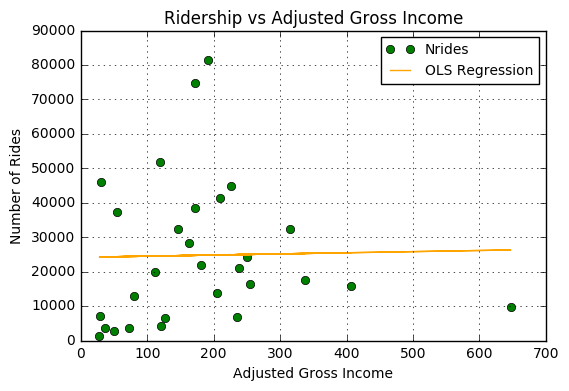

In [20]:
# Fit model with an OLS regression
model0 = smf.ols('Nrides ~ incomePC', data = cbincome).fit()

pl.plot(cbincome['incomePC'], cbincome['Nrides'],'o', color = 'green')
pl.ylabel('Number of Rides')
pl.xlabel('Adjusted Gross Income')
pl.title('Ridership vs Adjusted Gross Income')

pl.plot(cbincome['incomePC'], model0.predict(), color = 'orange', label = 'OLS Regression')
pl.legend(loc = 'upper right', fontsize = 10)
pl.grid(True)

Figure 1: The plot depicts the number of CitiBike riders in June 2015 by Adjusted Gross Income for their Zipcode. As the income increases, the ridership tends to decrease. Most riders have an AGI between 100 and 250.

## 6) Improve the fit by removing 2 ''suspected'' outliers and quantify the improvement

In [21]:
#cbincome = cbincome[cbincome.ZipCodes != 10005]
cbincome = cbincome[cbincome.ZipCodes != 10003]
cbincome = cbincome[cbincome.ZipCodes != 10011]

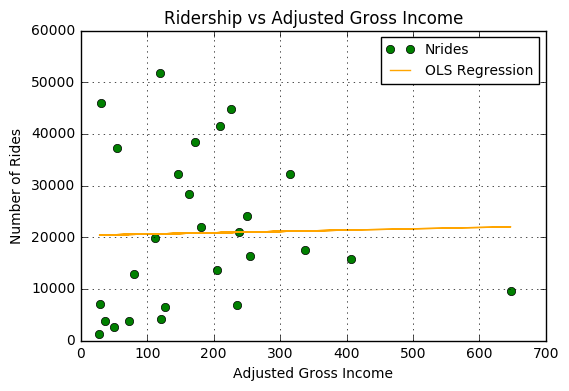

In [22]:
model0 = smf.ols('Nrides ~ incomePC', data = cbincome).fit()

pl.plot(cbincome['incomePC'], cbincome['Nrides'],'o', color = 'green')
pl.ylabel('Number of Rides')
pl.xlabel('Adjusted Gross Income')
pl.title('Ridership vs Adjusted Gross Income')

pl.plot(cbincome['incomePC'], model0.predict(), color = 'orange', label = 'OLS Regression')
pl.legend(loc = 'upper right', fontsize = 10)
pl.grid(True)

Figure 2: The plot depicts the number of CitiBike riders in June 2015 by Adjusted Gross Income for their Zipcode, minus outliers. As the income increases, the ridership tends to decrease. Most riders have an AGI between 100 and 250.

## 7) Fit a 2nd degree polynomial to the same data

In [23]:
cbincome = cbincome.sort_values('incomePC')

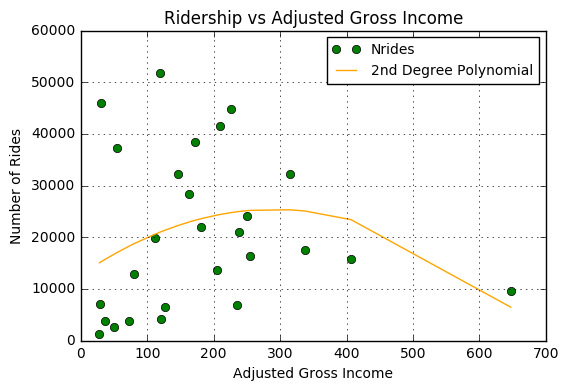

In [24]:
# Prepare and fit model
cbincome['incomePCSquared'] = cbincome['incomePC']**2

model2 = smf.ols('Nrides ~ incomePCSquared + incomePC', data = cbincome).fit()

# Plot second degree polynomial
pl.plot(cbincome['incomePC'], cbincome['Nrides'], 'o', color = 'green')
pl.ylabel('Number of Rides')
pl.xlabel('Adjusted Gross Income')
pl.title('Ridership vs Adjusted Gross Income')
pl.grid(True)

pl.plot(cbincome['incomePC'], model2.predict(), color = 'orange', label = '2nd Degree Polynomial')
pl.legend(loc = 'upper right', fontsize = 10)

Figure 3: The plot depicts the number of CitiBike riders in June 2015 by Adjusted Gross Income for their Zipcode, minus outliers. As the income increases, the ridership tends to decrease. The data is fit with a second degree polynomial. 

## 8) Formally compare the first and second degree polynomial fit and decide which is better and if the addition of the extra model parameter is justified by the data (make plots where appropriate)


**Idea**: The 2nd Degree polynomial fit will more accurately describe the data. 

**H<sub>o</sub>**: The 2nd degree polynomial will equally or less accurately describe the Ridership vs Income data, than the OLS Regression. Significance level = 0.05

**H<sub>a</sub>**: The 2nd degree polynomial will more accurately describe the Ridership vs Income data, than the OLS regression. Significance level = 0.05

In [25]:
print ("LR : ", -2 * (-model2.llf - (-model0.llf)))
print ("LR from statsmodels:", model2.compare_lr_test(model0))

LR :  2.59710034628
LR from statsmodels: (2.5971003462752833, 0.10705942937226394, 1.0)


Since the p-value is greater than than .05 we ** can not reject** the Null Hypothesis. 

## 9) Test with 2016, discuss the results (make plots where appropriate)

In [26]:
os.getenv('PUIDATA')
myzip = os.getenv('PUIDATA') + '/' + '201601-citibike-tripdata.zip'
myzip = zipfile.ZipFile(myzip)
myzip.extractall()
myzip.open('201601-citibike-tripdata.csv')
cb2016 = pd.read_csv('201601-citibike-tripdata.csv')

In [27]:
cb2016['ZipCodes'] = cb2016['start station id'].astype(str).map(stid2zip)

In [28]:
cbgroup2 = cb2016.groupby(['ZipCodes']).count()
cbgroup2['ZipCodes'] = cbgroup2.index
cbgroup2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,ZipCodes
ZipCodes,,,,,,,,,,,,,,,,
914.0,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1720,1655,1720,914.0
1001.0,305,305,305,305,305,305,305,305,305,305,305,305,305,300,305,1001.0
1007.0,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1492,1384,1492,1007.0
1022.0,398,398,398,398,398,398,398,398,398,398,398,398,398,388,398,1022.0
1109.0,250,250,250,250,250,250,250,250,250,250,250,250,250,222,250,1109.0


In [29]:
cbgroup2.drop(cbgroup2[cbgroup2['ZipCodes'] < 10000].index,inplace = True)

In [30]:
cbincome2 = pd.merge(cbgroup2, zipincome, on = 'ZipCodes')
cbincome2['Nrides'] = cbincome2['starttime']
cbincome2 = cbincome2[['ZipCodes','Income','N','Njoint','Ndeps','incomePC','Nrides']]
cbincome2.head(30)

,ZipCodes,Income,N,Njoint,Ndeps,incomePC,Nrides
0,10001.0,2363960.0,14080.0,2410.0,3250.0,119.754813,26413
1,10002.0,2215542.0,43370.0,11040.0,19160.0,30.114748,22854
2,10003.0,6910992.0,29810.0,5460.0,4790.0,172.516026,34824
3,10004.0,925417.0,2540.0,840.0,1130.0,205.192239,4828
4,10005.0,5545849.0,5890.0,1340.0,1340.0,647.123571,4137
5,10006.0,440723.0,2450.0,490.0,520.0,127.376590,2298
6,10007.0,2047053.0,3350.0,1200.0,1520.0,337.241021,7122
7,10009.0,2580470.0,33310.0,5030.0,9590.0,53.838306,18314
8,10010.0,3989916.0,17550.0,3560.0,3340.0,163.186748,13883
9,10011.0,7959849.0,30270.0,5700.0,5510.0,191.896070,41305


#### In comparison to the 2015 data, the outliers are the same at zipcode 10003 and 100011. 

## 10) Fit the rides to the income per person, discuss the result (make plots where appropriate)

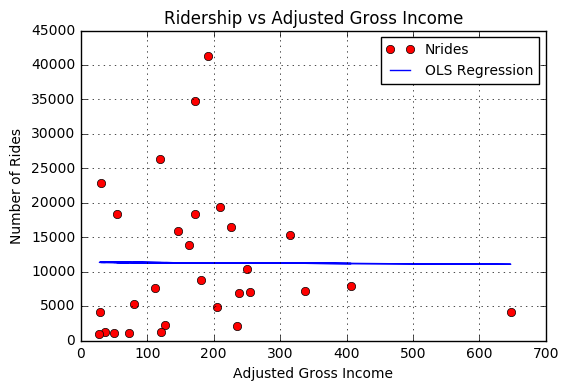

In [31]:
# Fit model with an OLS regression
model3 = smf.ols('Nrides ~ incomePC', data = cbincome2).fit()

pl.plot(cbincome2['incomePC'], cbincome2['Nrides'],'o', color = 'red')
pl.ylabel('Number of Rides')
pl.xlabel('Adjusted Gross Income')
pl.title('Ridership vs Adjusted Gross Income')

pl.plot(cbincome2['incomePC'], model3.predict(), color = 'blue', label = 'OLS Regression')
pl.legend(loc = 'upper right', fontsize = 10)
pl.grid(True)

Figure 4: The plot depicts the number of CitiBike riders in January 2016 by Adjusted Gross Income for their Zipcode, minus outliers. As the income increases, the ridership tends to decrease. Most riders have an AGI between 100 and 250.

In [53]:
#cbincome2 = cbincome2[cbincome2.ZipCodes != 10005]
cbincome2 = cbincome2[cbincome2.ZipCodes != 10003]
cbincome2 = cbincome2[cbincome2.ZipCodes != 10011]

In [33]:
cbincome2 = cbincome2.sort_values('incomePC')

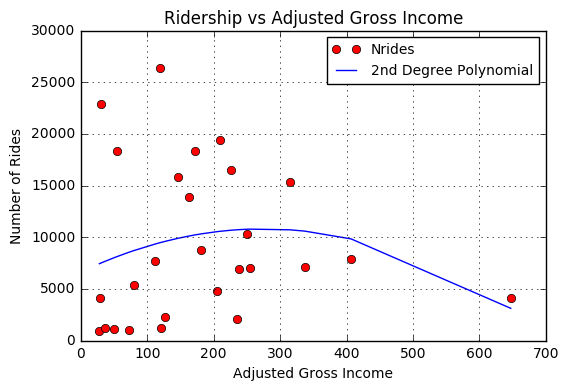

In [34]:
# Prepare and fit model
cbincome2['incomePCSquared'] = cbincome2['incomePC']**2

model4 = smf.ols('Nrides ~ incomePCSquared + incomePC', data = cbincome2).fit()

# Plot second degree polynomial
pl.plot(cbincome2['incomePC'], cbincome2['Nrides'], 'o', color = 'red')
pl.ylabel('Number of Rides')
pl.xlabel('Adjusted Gross Income')
pl.title('Ridership vs Adjusted Gross Income')
pl.grid(True)

pl.plot(cbincome2['incomePC'], model4.predict(), color = 'blue', label = '2nd Degree Polynomial')
pl.legend(loc = 'upper right', fontsize = 10)

Figure 5: The plot depicts the number of CitiBike riders in January 2016 by Adjusted Gross Income for their Zipcode, minus outliers. As the income increases, the ridership tends to decrease. The data is fit with a second degree polynomial. 

**Idea**: The 2nd Degree polynomial fit will more accurately describe the data. 

**H<sub>o</sub>**: The 2nd degree polynomial will equally or less accurately describe the Ridership vs Income data, than the OLS Regression. Significance level = 0.05

**H<sub>a</sub>**: The 2nd degree polynomial will more accurately describe the Ridership vs Income data, than the OLS regression. Significance level = 0.05

In [35]:
print ("LR : ", -2 * (-model4.llf - (-model3.llf)))
print ("LR from statsmodels:", model4.compare_lr_test(model3))

LR :  61.9046023337
LR from statsmodels: (61.904602333666958, 2.3027186922935496e-13, 3.0)


Since the p-value is less than than .05 we can **reject** the Null Hypothesis. 

## EC: Speculate on reasons why incomePC fit is different from the income fit (if it is).

2015 Data with Income fit instead of incomePC

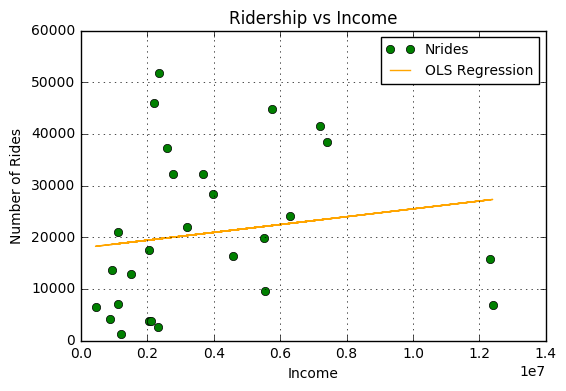

In [38]:
# Fit model with an OLS regression
model5 = smf.ols('Nrides ~ Income', data = cbincome).fit()

pl.plot(cbincome['Income'], cbincome['Nrides'],'o', color = 'green')
pl.ylabel('Number of Rides')
pl.xlabel('Income')
pl.title('Ridership vs Income')

pl.plot(cbincome['Income'], model5.predict(), color = 'orange', label = 'OLS Regression')
pl.legend(loc = 'upper right', fontsize = 10)
pl.grid(True)

Figure 6: The plot depicts the number of CitiBike riders in June 2015 by Income for their Zipcode. As the income increases, the ridership tends to decrease.

In [45]:
cbincome = cbincome[cbincome.ZipCodes != 10003]
cbincome = cbincome[cbincome.ZipCodes != 10011]
cbincome = cbincome.sort_values('Income')

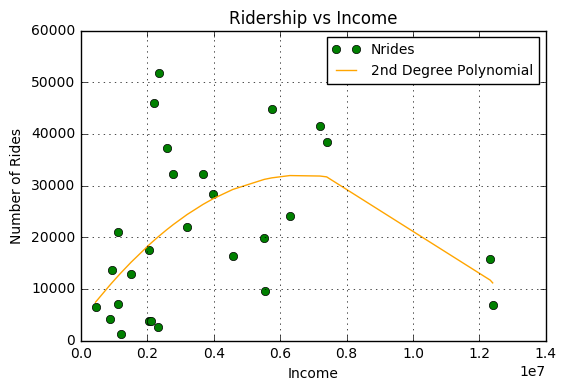

In [48]:
# Prepare and fit model
cbincome['incomeSquared'] = cbincome['Income']**2

model6 = smf.ols('Nrides ~ incomeSquared + Income', data = cbincome).fit()

# Plot second degree polynomial
pl.plot(cbincome['Income'], cbincome['Nrides'], 'o', color = 'green')
pl.ylabel('Number of Rides')
pl.xlabel('Income')
pl.title('Ridership vs Income')
pl.grid(True)

pl.plot(cbincome['Income'], model6.predict(), color = 'orange', label = '2nd Degree Polynomial')
pl.legend(loc = 'upper right', fontsize = 10)

In [52]:
print ("LR : ", -2 * (-model6.llf - (-model5.llf)))
print ("LR from statsmodels:", model6.compare_lr_test(model5))

LR :  8.10086295645
LR from statsmodels: (8.1008629564469175, 0.0044244188870783165, 1.0)


Since the p-value is less than .05 we **can reject** the Null Hypothesis. In comparison with incomePC, the 2nd degree polynomial was a better fit when ridership was being compared to Income. I speculate that this may be the case because the outliers are different between Income and incomePC. 